In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
df = pd.read_csv(r"CC GENERAL.csv")

In [5]:
# Data Preprocessing:
# Display sum of missing values before cleaning
print("Sum of NA before cleaning:")
print(df.isna().sum())

#Drop rows with missing values
df_cleaned = df.dropna()

#Display sum of missing values after cleaning
print("\nSum of NA after cleaning:")
print(df_cleaned.isna().sum())

#Check for duplicates
print("\nDuplicates before removal:")
print(df_cleaned.duplicated().sum())

#Remove duplicates
df_no_duplicates = df_cleaned.drop_duplicates()

#Get numerical columns
num_cols = df_no_duplicates.select_dtypes(include=np.number).columns

#Handle Outliers
z_scores = np.abs((df_no_duplicates[num_cols] - df_no_duplicates[num_cols].mean()) / df_no_duplicates[num_cols].std())
outliers = z_scores > 3  

#Replace outliers with NaN 
df_no_duplicates.loc[outliers.any(axis=1), num_cols] = np.nan
df_no_duplicates = df_no_duplicates.dropna()

#Data Normalization or Scaling
scaler = RobustScaler()
df_no_duplicates[num_cols] = scaler.fit_transform(df_no_duplicates[num_cols])



Sum of NA before cleaning:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Sum of NA after cleaning:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES 

Statistical Summaries:
            BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  7.190000e+03        7190.000000  7190.000000      7.190000e+03   
mean   2.844004e-01          -1.032095     0.397023      7.456391e-01   
std    9.222222e-01           2.054717     1.045919      1.494215e+00   
min   -5.008548e-01          -8.000011    -0.376943     -7.131493e-02   
25%   -4.196008e-01          -1.000000    -0.326808     -7.131493e-02   
50%   -3.417947e-17           0.000000     0.000000     -6.613633e-18   
75%    5.803992e-01           0.000000     0.673192      9.286851e-01   
max    4.244249e+00           0.000000     6.986845      1.015754e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            7.190000e+03   7190.000000          7190.000000   
mean             5.161220e-01      0.756310            -0.007234   
std              1.134427e+00      1.379168             0.475888   
min             -2.134256e-01      0.000000    

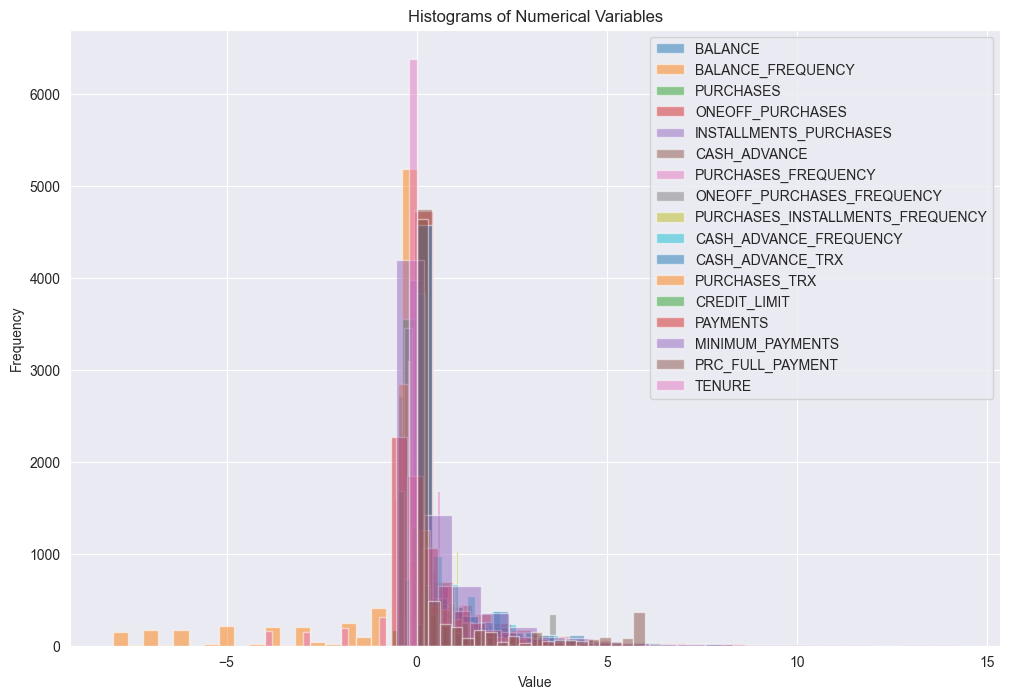

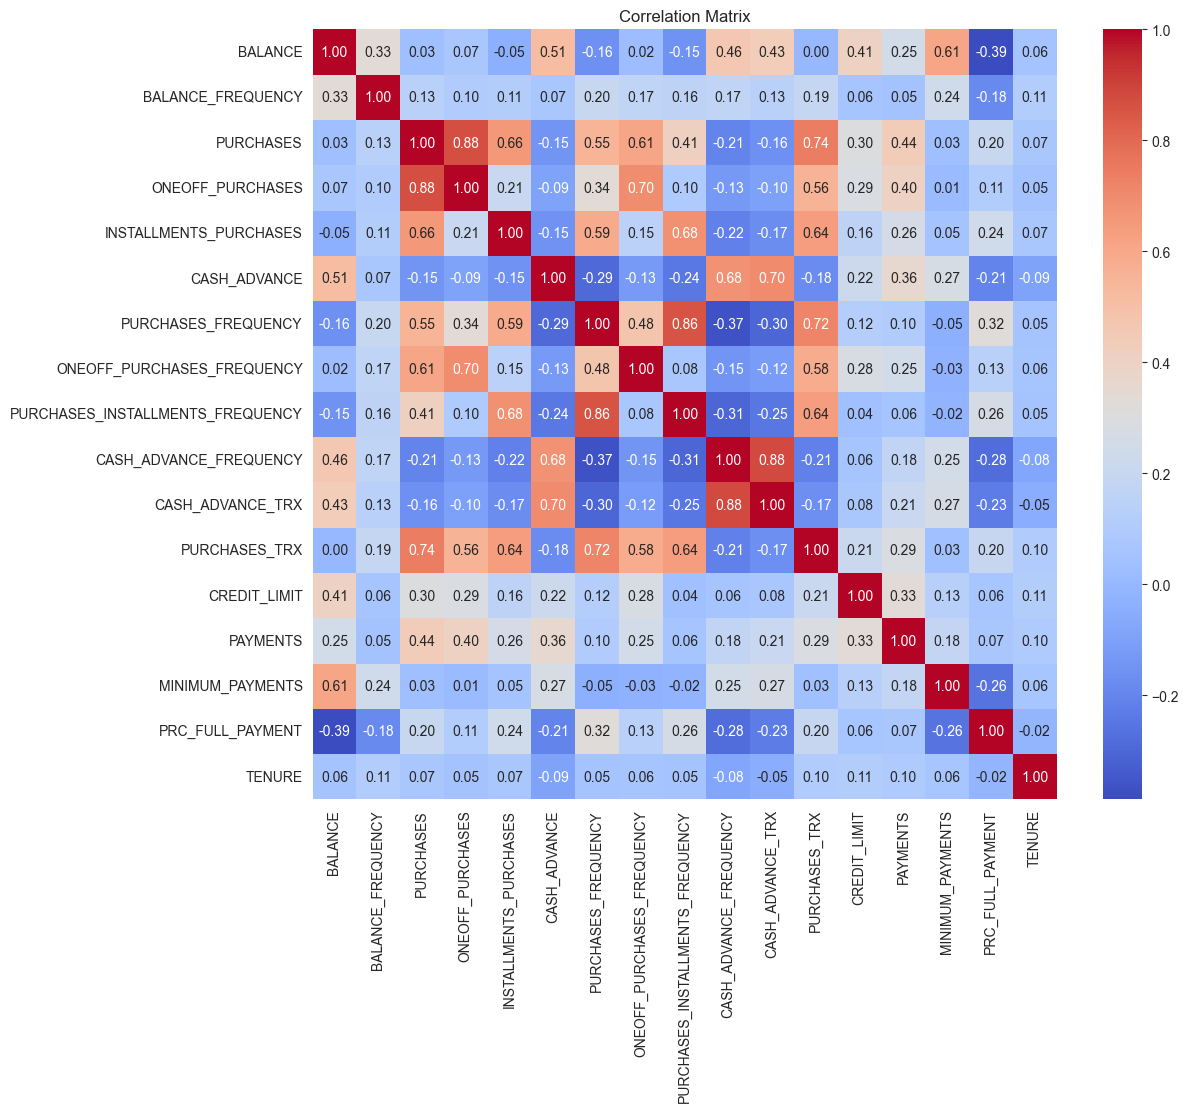

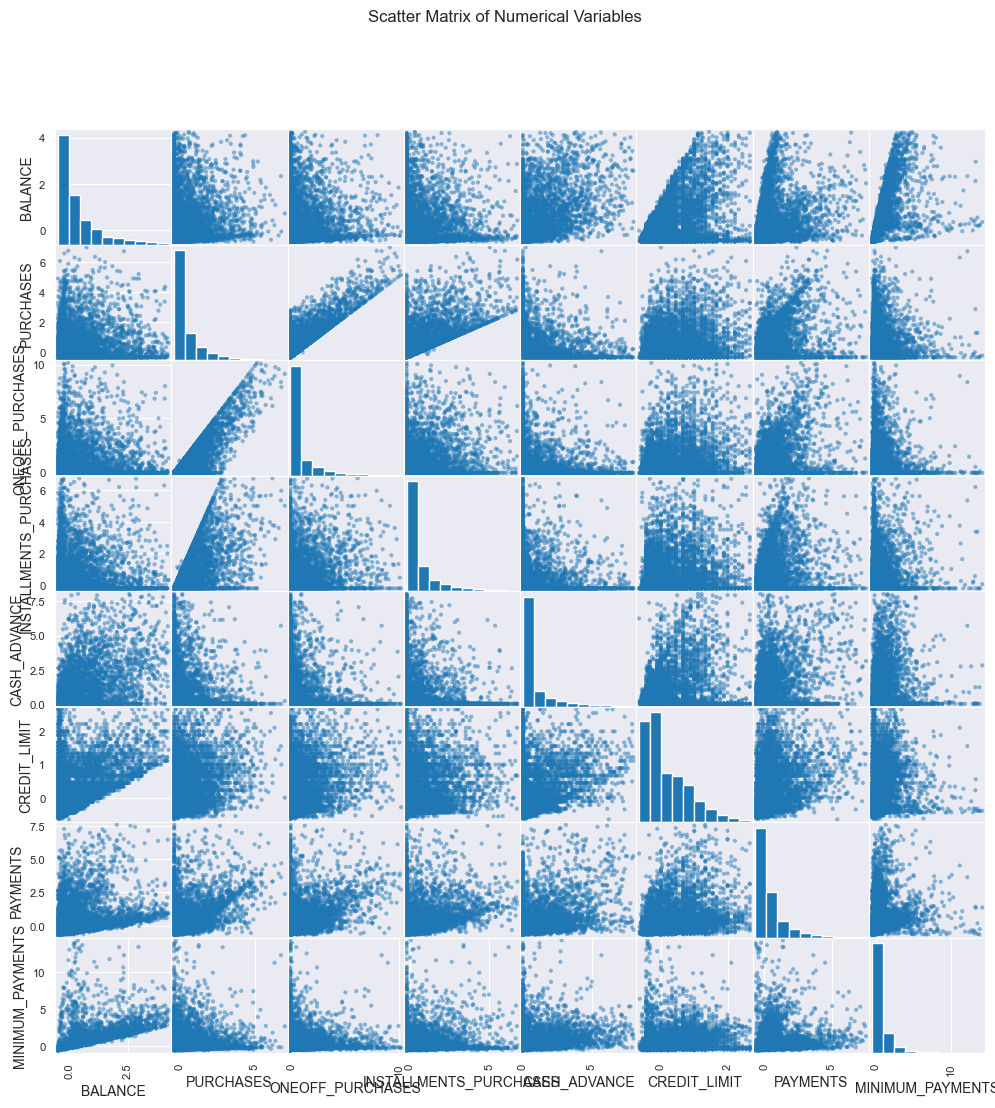

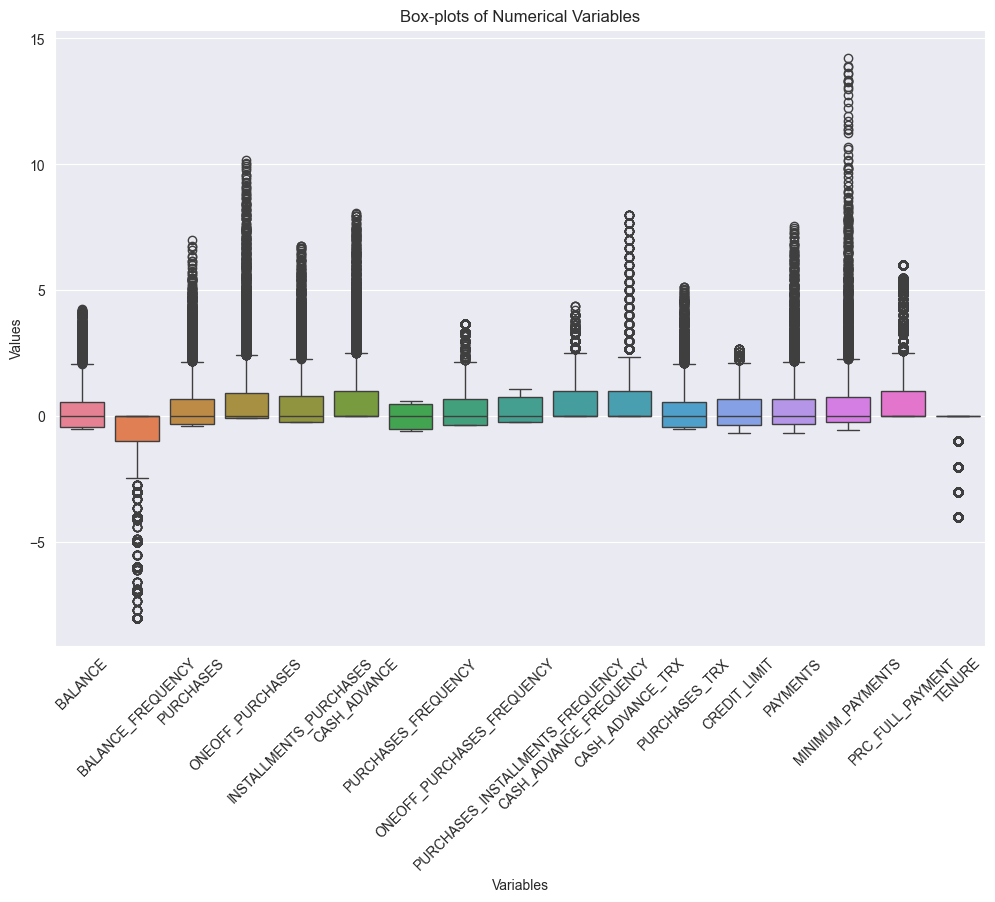

In [10]:
# Exploratory Data Analysis (EDA):
# Display basic statistical summaries
print("Statistical Summaries:")
print(df_no_duplicates.describe())

#Plot histograms for numerical columns
plt.figure(figsize=(12, 8))
for column in num_cols:
    plt.hist(df_no_duplicates[column], bins=20, alpha=0.5, label=column)
plt.title("Histograms of Numerical Variables")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Calculate correlation matrix
correlation_matrix = df_no_duplicates[num_cols].corr()

#Create heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

numerical_columns_for_scatter_matrix = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                     'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                     'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

#Create scatter matrix
scatter_matrix(df_no_duplicates[numerical_columns_for_scatter_matrix], figsize=(12, 12), alpha=0.5)
plt.suptitle("Scatter Matrix of Numerical Variables")
plt.show()

#Create Box-plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_no_duplicates[num_cols])
plt.title("Box-plots of Numerical Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


In [7]:
# Convert the selected columns to a Numpy array
selected_columns = ['BALANCE', 'CASH_ADVANCE']
X = df_no_duplicates[selected_columns]
data = np.array(X)

Labels: [0 1 0 ... 0 0 0] 

Clusters:
 [[-0.29099562  0.03053921]
 [ 1.02431114  2.26441642]] 

Cluster 0 : [[-0.47624993  0.        ]
 [ 1.00033835  0.        ]
 [-0.00888323  0.        ]
 ...
 [ 0.02217009  1.27034567]
 [-0.41798405  0.        ]
 [-0.30167071  0.46164909]]
Cluster 1 : [[ 1.42589365  7.09297957]
 [ 3.64220417  2.53369062]
 [ 0.74579732  3.06518248]
 ...
 [-0.01756237  2.81840998]
 [-0.0875243   1.92535437]
 [ 0.33118024  4.57859463]]


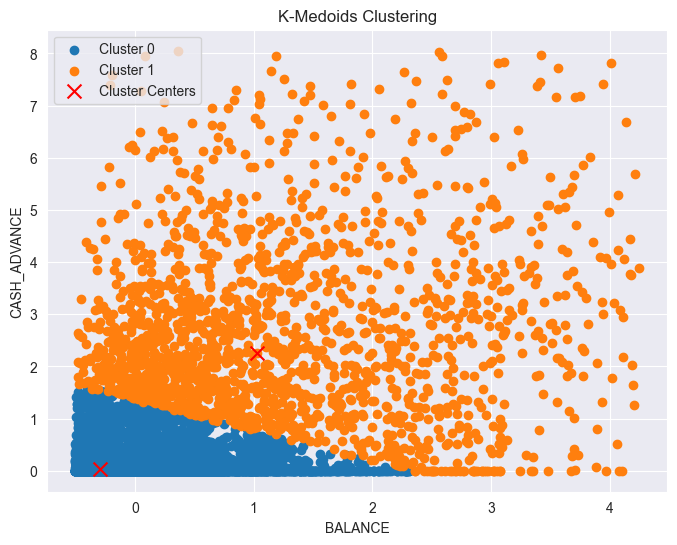

In [8]:
# K-Medoids clustering algorithm
k = 2
kmedoids = KMedoids(n_clusters=k).fit(data)
clusters = kmedoids.cluster_centers_
labels = kmedoids.labels_

print("Labels:", labels, "\n")
print("Clusters:\n", clusters, "\n")

for j in range(k):
    print("Cluster", j, ":", data[labels == j])

#Plotting the clusters
plt.figure(figsize=(8, 6))

#Plotting points for each cluster
for j in range(k):
    cluster_points = data[labels == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {j}')

#Plotting cluster centers
plt.scatter(clusters[:, 0], clusters[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.title('K-Medoids Clustering')
plt.legend()
plt.grid(True)
plt.show()

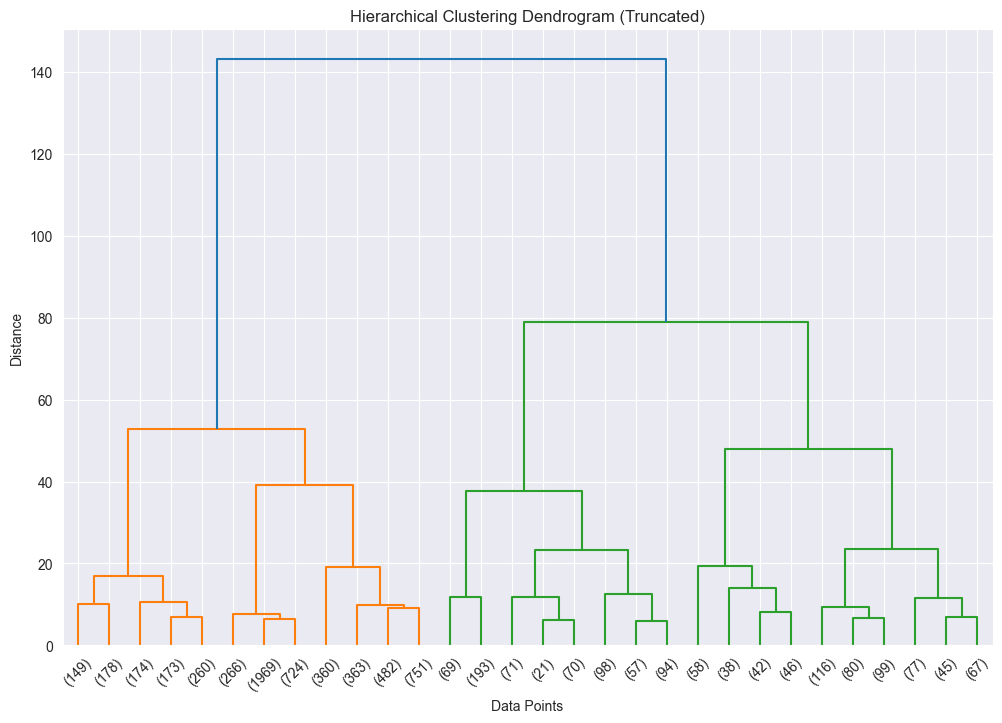

In [9]:
# Perform hierarchical clustering:
linkage_matrix = linkage(data, method='ward', metric='euclidean')

# Plot the dendrogram without the last node
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)  
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
